### **Title:** *XXXXXXXXXXXX*

In [65]:
# What is the S&P 500 and the SPY Ticker?
# The S&P 500 is a stock market index that measures the performance of 500 of the largest publicly traded companies in the U.S.
# Most people consider it to be a broad snapshot of the market's overall health.
# The SPY ticker represents the SPDR S&P 500 ETF.



##### **The original series of analyses was quite extensive, and due to its length, it has taken me longer than expected to publish.** As a result, I've decided to break the series into smaller parts, releasing the completed analyses first, while continuing to focus on finalizing and publishing the remaining ones as they are finished. I'm also thrilled to dive into several intriguing research questions related to this topic and can't wait to explore them further as the work progresses.

##### **Summary of Studies Conducted:** XXXXXXXXXXXXXXXXXX

##### **START OF THE ANALYSIS:** 
##### Importing necessary libraries to conduct the studies and visualizations

In [66]:
import pandas as pd
import numpy as np

In [67]:
import yfinance as yf
# note I had to pip install it on my terminal for it to work.
# % pip show yfinance

In [68]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\alvar\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [69]:
from datetime import datetime, timedelta

from scipy.stats import ttest_ind, f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

Import Stock information from yahoo finance.
Note: Ideally, next time I should make this code more streamline so it can be used with other ticker symbols more quickly. 
For example, next time, I should not add the name SPY on the so I can quick switch the company / ticker symbol and redo the analysis for multiple stocks. 

In [70]:
# Define the ticker symbol
ticker_symbol = 'SPY'

spy = yf.Ticker(ticker_symbol)

# date range
start_date = '1995-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Set end date to today

# Fetch historical market data without actions
spy_data = spy.history(start=start_date, end=end_date)

# Getting historical market data without dividends, stock splits, or capital gains
spy_data = spy.history(start=start_date, end=end_date, actions=False)
spy_data

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,26.941006,27.023901,26.931795,26.987059,324300
1995-01-04 00:00:00-05:00,27.106802,27.116013,26.968643,27.116013,351800
1995-01-05 00:00:00-05:00,27.134434,27.180487,27.088381,27.116013,89800
1995-01-06 00:00:00-05:00,27.171276,27.263382,27.060749,27.143644,448400
1995-01-09 00:00:00-05:00,27.134437,27.171280,27.116016,27.171280,36800
...,...,...,...,...,...
2024-12-13 00:00:00-05:00,606.400024,607.130005,602.809998,604.210022,35904700
2024-12-16 00:00:00-05:00,606.000000,607.780029,605.210022,606.789978,43695200
2024-12-17 00:00:00-05:00,604.190002,605.169983,602.890015,604.289978,55773500


In [71]:
# creating a df copy just in case the original is needed
spy_basicdata = spy_data.copy()

In [72]:
spy_basicdata.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [73]:
spy_basicdata.shape

(7545, 5)

In [74]:
spy_basicdata.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,26.941006,27.023901,26.931795,26.987059,324300
1995-01-04 00:00:00-05:00,27.106802,27.116013,26.968643,27.116013,351800
1995-01-05 00:00:00-05:00,27.134434,27.180487,27.088381,27.116013,89800
1995-01-06 00:00:00-05:00,27.171276,27.263382,27.060749,27.143644,448400
1995-01-09 00:00:00-05:00,27.134437,27.171280,27.116016,27.171280,36800


In [75]:
spy_basicdata.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-13 00:00:00-05:00,606.400024,607.130005,602.809998,604.210022,35904700
2024-12-16 00:00:00-05:00,606.000000,607.780029,605.210022,606.789978,43695200
2024-12-17 00:00:00-05:00,604.190002,605.169983,602.890015,604.289978,55773500
2024-12-18 00:00:00-05:00,603.979980,606.409973,585.890015,586.280029,108248700
2024-12-19 00:00:00-05:00,591.359985,593.000000,585.849976,586.099976,85081800


# -------------------------------------------------------------------------------------------------

### Section 1: Basic Statistical Exploratory Analysis:

**Starting of with an exploratory analysis of the basic statistical data overtime.**

#### Feature Engineering
I created the following features in order to understand the overall behavior of price for each particular year. For example,
1. **'30-Day Std Dev'** - reflects short term volatility of price

2. **'Annual Std Dev'** - reflects a long term volatility of price

3. **'Std Dev Ratio'** - Initially, I did not include any other Std Dev columns. However, when I displayed the table, I thought the difference between the YoY changes in '30-Day Std Dev' was interesting. I also wanted to create a relative field that could potentially show calmness versus high volatility in the market.

4. **'Highest High', 'Lowest Low','Average High'** - Other notable fields created were regarding Price. For example, "High" Price and "Low" Price. I wanted to know the highest high and the lowest low.

5. **'Start Price', 'End Price'** - I also included the Start Price and End Price of the Year.

6. **'Average Volume', 'Highest Volume Day', 'Lowest Volume Day'** - Lastly, I create a series of fields regarding "Volume" such as the average, highest, and lowest for each year.


In [76]:
# Ensure index is in datetime format
spy_data.index = pd.to_datetime(spy_data.index, errors='coerce')

# Add columns for Year and Quarter
spy_data['Year'] = spy_data.index.year
spy_data['Quarter'] = spy_data.index.quarter

In [77]:
# Calculate Quarterly Performance
quarterly_performance = spy_data.groupby(['Year', 'Quarter'])['Close'].agg(['first', 'last'])
quarterly_performance['Quarterly Performance (%)'] = (
    (quarterly_performance['last'] - quarterly_performance['first']) / quarterly_performance['first']
) * 100
quarterly_performance['QoQ Performance (%)'] = quarterly_performance.groupby('Year')['Quarterly Performance (%)'].diff()
quarterly_performance.reset_index(inplace=True)

In [78]:
# Pivot Quarterly Performance to separate columns for each quarter
quarterly_performance_pivot = quarterly_performance.pivot(index='Year', columns='Quarter', values='Quarterly Performance (%)')
quarterly_performance_pivot.columns = ['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance']

# Calculate Quarterly Std Dev
quarterly_std_dev = spy_data.groupby(['Year', 'Quarter'])['Close'].std().unstack(level='Quarter')

In [79]:
# Ensure all quarters are included
expected_quarters = [1, 2, 3, 4]
quarterly_std_dev = quarterly_std_dev.reindex(columns=expected_quarters).fillna(0)
quarterly_std_dev.columns = ['Q1 Std Dev', 'Q2 Std Dev', 'Q3 Std Dev', 'Q4 Std Dev']
annual_std_dev = spy_data.groupby('Year')['Close'].std().rename('Annual Std Dev')

In [80]:
# Create Yearly Summary
yearly_summary = spy_data.groupby('Year').agg({
    'Open': ['mean'],
    'High': ['mean', 'max'],
    'Low': 'min',
    'Volume': ['mean', 'max', 'min'],
    'Close': ['first', 'last']
})

# Flatten the multi-level index
yearly_summary.columns = [
    "Average Open", "Average High", "Highest High", "Lowest Low",
    "Average Volume", "Highest Volume Day", "Lowest Volume Day",
    "Start Price", "End Price"
]

In [81]:
# Merge Quarterly and Annual Data
yearly_summary.reset_index(inplace=True)
yearly_summary = yearly_summary.merge(quarterly_std_dev, on='Year', how='left')
yearly_summary['Annual Std Dev'] = annual_std_dev.values

In [82]:
# Merge Quarterly Performance and QoQ Performance (separated by quarters)
yearly_summary = yearly_summary.merge(quarterly_performance_pivot, on='Year', how='left')

In [83]:
# Calculate Yearly Performance (%)
yearly_summary['Yearly Performance (%)'] = (
    (yearly_summary['End Price'] - yearly_summary['Start Price']) / yearly_summary['Start Price']) * 100

In [84]:
# Calculate Price Range and Price Difference
yearly_summary['Price Range'] = yearly_summary['Highest High'] - yearly_summary['Lowest Low']
yearly_summary['Price Difference'] = yearly_summary['End Price'] - yearly_summary['Start Price']

In [85]:
# Format volume columns with commas
# Only HIGHEST VOLUME DAY Day and LOWEST VOLUME DAY were formated to include commas
# When I formated the AVERAGE VOLUME, the Time Series chart below looked weird.
# The bar-chart showed the bars increasing regardless of whether the volume went up or down the next year.
volume_columns = ['Highest Volume Day', 'Lowest Volume Day']
yearly_summary[volume_columns] = yearly_summary[volume_columns].applymap(lambda x: f"{x:,.0f}")

In [86]:
yearly_summary = pd.DataFrame(yearly_summary)
yearly_summary.columns

Index(['Year', 'Average Open', 'Average High', 'Highest High', 'Lowest Low',
       'Average Volume', 'Highest Volume Day', 'Lowest Volume Day',
       'Start Price', 'End Price', 'Q1 Std Dev', 'Q2 Std Dev', 'Q3 Std Dev',
       'Q4 Std Dev', 'Annual Std Dev', 'Q1 Performance', 'Q2 Performance',
       'Q3 Performance', 'Q4 Performance', 'Yearly Performance (%)',
       'Price Range', 'Price Difference'],
      dtype='object')

In [87]:
yearly_summary.head()
# Reminder, I formated only the Highest Volume and Lowest Volume not the Average Volume
# Avg Volume will be used in a chart and when it was formated the chart was not displaying properly

,Year,Average Open,Average High,Highest High,Lowest Low,Average Volume,Highest Volume Day,Lowest Volume Day,Start Price,End Price,...,Q3 Std Dev,Q4 Std Dev,Annual Std Dev,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%),Price Range,Price Difference
0,1995,32.305427,32.426335,37.636164,26.931795,3.137948e+05,"1,349,800","9,500",26.987059,37.077347,...,0.699873,0.905058,2.937842,10.046349,8.940792,7.667557,6.319183,37.389359,10.704369,10.090288
1,1996,40.850209,41.062697,46.937224,35.965493,9.028118e+05,"4,141,000","154,200",37.473106,45.418819,...,1.120510,1.385170,2.542436,4.560898,3.098320,1.906793,7.545938,21.203775,10.971731,7.945713
2,1997,54.160123,54.568474,61.587893,44.746076,3.187592e+06,"19,548,000","624,600",45.534130,60.622814,...,1.039426,1.418853,4.935257,2.205060,16.869383,6.018755,1.907160,33.137087,16.841817,15.088684
3,1998,68.257023,68.786796,78.926487,56.777792,7.433582e+06,"24,887,800","1,507,100",60.935116,78.017014,...,3.837568,4.812287,4.350746,13.008027,2.566970,-10.918720,25.209131,28.032929,22.148695,17.081898
4,1999,84.569269,85.167442,94.363808,76.158495,7.238962e+06,"16,856,100","1,693,900",77.839058,93.924210,...,2.354795,3.941340,3.868741,4.596531,6.239123,-6.461373,14.608066,20.664628,18.205313,16.085152


In [88]:
yearly_summary.tail()

,Year,Average Open,Average High,Highest High,Lowest Low,Average Volume,Highest Volume Day,Lowest Volume Day,Start Price,End Price,...,Q3 Std Dev,Q4 Std Dev,Annual Std Dev,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%),Price Range,Price Difference
25,2020,301.368453,303.920437,358.635108,204.229125,1.003593e+08,"392,220,700","26,457,900",302.208679,354.295013,...,10.021347,12.886044,30.903858,-20.194049,25.824510,8.279856,11.403316,17.235221,154.405983,52.086334
26,2021,406.146966,408.015318,459.959036,345.709669,7.379523e+07,"183,433,000","34,848,500",349.471710,456.079590,...,6.339619,12.324004,28.785145,7.819638,7.201637,0.019713,9.761554,30.505439,114.249367,106.607880
27,2022,395.079804,398.492222,460.900046,338.142318,9.475961e+07,"251,783,900","30,545,400",458.720367,373.185486,...,17.075279,13.014065,26.663549,-5.163582,-16.347351,-5.926120,4.794244,-18.646410,122.757728,-85.534882
28,2023,419.446682,421.703509,473.088829,368.696668,8.192389e+07,"189,253,000","29,737,400",371.614410,470.869751,...,7.368471,19.354557,24.112874,7.912525,8.267813,-3.335393,11.684052,26.709228,104.392161,99.255341
29,2024,537.682134,539.898521,609.070007,462.072696,5.726893e+07,"146,267,400","26,906,600",468.234558,586.099976,...,13.001031,12.580697,37.759219,11.011366,4.560993,5.534139,3.074106,25.172302,146.997311,117.865417


### **Interpretation of Yearly SPY Metrics Summary:**

#### **"Performance Table with Enhanced Formatting" Chart:**


In [120]:
# Function to generate cell colors based on performance thresholds
def get_cell_colors(df):
    colors = []
    for index, row in df.iterrows():
        row_colors = []
        for col in ['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance', 'Yearly Performance (%)']:
            value = row[col]
            if 5 <= value < 10:
                row_colors.append('mediumpurple')  # Purple for 5% to 9%
            elif value >= 10:
                row_colors.append('lightgreen')  # Green for 10% or more
            elif -10 <= value < -5:
                row_colors.append('lightsalmon')  # Orange for -5% to -9%
            elif value < -10:
                row_colors.append('lightcoral')  # Red for -10% or less
            else:
                row_colors.append('white')  # Default color
        colors.append(row_colors)
    return colors

In [121]:
# Generate cell colors based on the data
cell_colors = get_cell_colors(yearly_summary)

In [134]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Year', 'Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance', 'Yearly Performance (%)'],
        align='center',
        fill_color='lightgrey',
        font=dict(size=14, color='black'),  # Adjusted font size for the header
        height=30  # Adjust header height if necessary
    ),
    cells=dict(
        values=[
            yearly_summary['Year'],
            yearly_summary['Q1 Performance'].round(2).astype(str) + '%',
            yearly_summary['Q2 Performance'].round(2).astype(str) + '%',
            yearly_summary['Q3 Performance'].round(2).astype(str) + '%',
            yearly_summary['Q4 Performance'].round(2).astype(str) + '%',
            yearly_summary['Yearly Performance (%)'].round(2).astype(str) + '%'
        ],
        align='center',
        fill_color=[['white'] * len(yearly_summary)] + list(zip(*cell_colors)),
        font=dict(size=12, color='black'),  # Adjusted font size for the cells
        height=25  # Adjust cell height if necessary
    )
)])

fig.add_annotation(
    text=(
        "<b>Shading Legend:</b> "
        "<span style='color:mediumpurple'>Purple</span>: 5% to 9%, "
        "<span style='color:lightgreen'>Green</span>: 10% or more, "
        "<span style='color:lightsalmon'>Orange</span>: -5% to -9%, "
        "<span style='color:lightcoral'>Red</span>: -10% or less, "
        "White: Everything else."
    ),
    x=0.3, y=1.15,  # Position above the chart
    xref='paper', yref='paper',
    showarrow=False,
    font=dict(size=15),
    align="center"
)

fig.update_layout(
    title="Performance Table with Enhanced Formatting",
    autosize=True,  # Automatically size to fit content
    height=960,  # Set a fixed height (adjust as needed based on the number of years)
)

fig.show()

### **Interpretation of Quarterly SPY Metrics Summary:**

#### **Best-performing Quarter & Average Quarterly Performance:**
- The best-performing quarter is Q4 Performance with an average performance of 5.46%. With Q4 outperforming other quarters, it would be a good idea to stay in the market during this time. 
- The average performance for Q1 is 1.84%, Q2 is 3.13%, Q3 is 0.09%, and Q4 is 5.46%. I wonder if Q3 low performancing is due to September consistently being a low performing month. However, this quarter can be used as a buying opportunity since Q4 has been statistically a stong performing quarter. 

#### **'Average Quarterly Performance by 5-Year Intervals' Chart:**
The chart provides insights into how quarterly performance trends have varied across distinct 5-year intervals:

**1995–1999: Q1: 6.88%, Q2: 7.54%, Q3: -0.36%, Q4: 11.12% -** 
- The late 1990s were a golden era for market performance, with Q4 boasting an impressive 11.12% average return, followed closely by Q2 at 7.54%. Yet, amidst this prosperity, it’s striking to note that Q3 lagged significantly with a nearly flat -0.36%.  This anomaly begs the question: what held back Q3 during a time of such overwhelming market optimism?

**2000–2004: Q1: -2.13%, Q2: 1.11%, Q3: -6.38%, Q4: 4.32% -** 
- The declines in Q1 and Q3 reflect heightened market volatility, likely influenced by the dot-com bubble burst. The strong negative performance of 2001-2002 skew the average negatively for the this period. It is interesting to see how quickly optimism can turn to fear and have it persist for years. In hindsight, these years were great buying opportunities for the upcoming market returns. 

**2005 to 2009: Q1 is -4.04%, Q2 is 2.99%, Q3 is 3.03%, and Q4 is -1.69%.**
- The more notably aspect of this time period is Q3 outperformance compared to other quarters. After the global financial crisis, Q3 emerged as the strongest quarter of this period, outperforming all others quarters, a rare instance of Q3 leading quarterly performance across all observed time frames. 

**2010–2014: Q1: 5.97%, Q2: -1.62%, Q3: 1.54%, Q4: 8.11% -** 
- The years following the financial crisis reflect a textbook recovery story. Q4 led the charge with an impressive 8.11%, while Q1 followed closely at 5.97%, driven by improving economic fundamentals and central bank support. However, Q2 lagged with a surprising -1.62%, hinting at mid-year corrections or cautious investor sentiment. This period reaffirms the resilience of markets and the critical role of liquidity in supporting asset prices.

**2015–2019: Q1: 4.11%, Q2: 2.88%, Q3: 1.78%, Q4: 2.74% -** 
- Balanced performance with moderate gains across all quarters. In stark contrast to the turbulence of earlier periods, these years offered consistency. Q1 (4.11%) led a balanced performance, with all quarters posting positive returns.

**2020–2024: Q1: 0.28%, Q2: 5.90%, Q3: 0.91%, Q4: 8.15% -** 
- The pandemic tested global markets like never before, yet Q4 maintained its dominance with an 8.15% return, showcasing the enduring year-end momentum. Q2 followed with a robust 5.90%, driven by fiscal stimulus and economic recovery efforts. However, Q1 (0.28%) and Q3 (0.91%) struggled, but in hindsight appeared to be consistently great buying opportunities due to the returns the following quarters. 

## **Next Steps for Deeper Analysis:**
- After returning the yearly and quarterly performance, a potential next analysis to conduct is to review Sector Rotation and performance to better understand how it influences results.


In [92]:
# Calculate the average performance for each quarter
quarterly_averages = yearly_summary[['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance']].mean()

# best-performing quarter
best_quarter = quarterly_averages.idxmax()
best_performance = quarterly_averages.max()
print(f"The best-performing quarter is {best_quarter} with an average performance of {best_performance:.2f}%.")

The best-performing quarter is Q4 Performance with an average performance of 5.46%.


In [93]:
quarterly_averages = yearly_summary[['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance']].mean()
average_sentence = (
    f"The average performance for Q1 is {quarterly_averages['Q1 Performance']:.2f}%, "
    f"Q2 is {quarterly_averages['Q2 Performance']:.2f}%, "
    f"Q3 is {quarterly_averages['Q3 Performance']:.2f}%, "
    f"and Q4 is {quarterly_averages['Q4 Performance']:.2f}%."
)
print(average_sentence)

The average performance for Q1 is 1.84%, Q2 is 3.13%, Q3 is 0.09%, and Q4 is 5.46%.


In [115]:
# Group the years into 5-year intervals and calculate the average performance for each quarter
yearly_summary['Year Group'] = (yearly_summary['Year'] // 5) * 5

# Calculate the average performance for each quarter within 5-year groups
grouped_quarterly_averages = yearly_summary.groupby('Year Group')[['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance']].mean()

In [116]:
for year_group, row in grouped_quarterly_averages.iterrows():
    print(
        f"From {year_group} to {year_group + 4}, "
        f"the average performance for Q1 is {row['Q1 Performance']:.2f}%, "
        f"Q2 is {row['Q2 Performance']:.2f}%, "
        f"Q3 is {row['Q3 Performance']:.2f}%, "
        f"and Q4 is {row['Q4 Performance']:.2f}%."
    )

From 1995 to 1999, the average performance for Q1 is 6.88%, Q2 is 7.54%, Q3 is -0.36%, and Q4 is 11.12%.
From 2000 to 2004, the average performance for Q1 is -2.13%, Q2 is 1.11%, Q3 is -6.38%, and Q4 is 4.32%.
From 2005 to 2009, the average performance for Q1 is -4.04%, Q2 is 2.99%, Q3 is 3.03%, and Q4 is -1.69%.
From 2010 to 2014, the average performance for Q1 is 5.97%, Q2 is -1.62%, Q3 is 1.54%, and Q4 is 8.11%.
From 2015 to 2019, the average performance for Q1 is 4.11%, Q2 is 2.88%, Q3 is 1.78%, and Q4 is 2.74%.
From 2020 to 2024, the average performance for Q1 is 0.28%, Q2 is 5.90%, Q3 is 0.91%, and Q4 is 8.14%.


In [95]:
grouped_quarterly_averages = yearly_summary.groupby('Year Group')[['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance']].mean().reset_index()
grouped_quarterly_averages = grouped_quarterly_averages.melt(
    id_vars='Year Group', 
    value_vars=['Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance'],
    var_name='Quarter', 
    value_name='Avg Performance'
)

# Format the Year Group for display as ranges (e.g., "1995-1999")
grouped_quarterly_averages['Year Group'] = grouped_quarterly_averages['Year Group'].apply(
    lambda x: f"{x}-{x+4}"
)

fig = px.bar(
    grouped_quarterly_averages,
    x='Year Group',
    y='Avg Performance',
    color='Quarter',
    barmode='group',
    labels={'Year Group': '5-Year Interval', 'Avg Performance': 'Average Performance (%)'},
    title='Average Quarterly Performance by 5-Year Intervals'
)

# Add value labels at the top of each bar
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Update layout for better readability
fig.update_layout(
    xaxis=dict(title='5-Year Interval', tickmode='linear'),
    yaxis=dict(title='Average Performance (%)'),
    legend=dict(title='Quarter'),
    template='plotly_white',
    uniformtext_minsize=10,  # Ensure consistent text size
    uniformtext_mode='show'
)

# Show the bar chart
fig.show()

### **Summary of 'Price Trend and Average Volume Over Years'**

3. **An unexpected finding was regarding the Volume overtime.** When the Volume was plotted, I went back to the code as I thought I had done an error. It was facinating to see that the year with the highest volume was 2008 and Volume has not recovered to that level since then. I do not know how to explain this and would love to take a further look in the future. 

    a. My assumption of a potential reason why I think 2008 was the year with the highest volume in addition to the following years (e.g. 2009,2010,2011) is fear. Perhaps the amount of fear investors had during that time made me sell at peak levels. On the other hand, since more individuals have now seen that markets eventually recover, their fear of the market has never reach the level of 2008. 

In [96]:
recession_periods = [
    {'start': pd.to_datetime('2001-03-01'), 'end': pd.to_datetime('2001-11-30')},
    {'start': pd.to_datetime('2007-12-01'), 'end': pd.to_datetime('2009-06-30')},
    {'start': pd.to_datetime('2020-02-01'), 'end': pd.to_datetime('2020-04-30')}
]

In [97]:
# Ensure 'Year' is a column and not an index
yearly_summary = yearly_summary.reset_index()
# Identify the 3 years with the highest and lowest average volume
highest_volume_years = yearly_summary.nlargest(3, 'Average Volume')['Year'].tolist()

In [98]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=yearly_summary['Year'],
        y=yearly_summary['End Price'],  # Replace with 'Start Price' or another column if preferred
        name='Price',
        line=dict(color='black'),
        yaxis='y1'
    )
)

fig.add_trace(
    go.Bar(
        x=yearly_summary['Year'],
        y=yearly_summary['Average Volume'],
        name='Average Volume',
        marker_color='blue',
        yaxis='y2',
        opacity=0.6,
        width=0.4  # Adjust the bar width
    )
)

fig.update_layout(
    title='Price Trend and Average Volume Over Years',
    xaxis=dict(
        title='Year',
        tickmode='linear',  # Ensure all years are displayed
        tick0=yearly_summary['Year'].min(),  # Start from the first year
        dtick=1,  # Increment ticks by 1 year
        tickangle=-90  # Rotate year labels vertically
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(color='black'),
        tickfont=dict(color='black')
    ),
    yaxis2=dict(
        title='Average Volume',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        anchor='x',
        overlaying='y',
        side='right',
        showgrid=False,
        range=[0, yearly_summary['Average Volume'].max() * 1.2]
    ),
    height=600,
    width=1400,
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0)'),
    bargap=0.2,
    barmode='overlay'
)

# Add vertical shading (if required)
shapes = []
for year in highest_volume_years:
    shapes.append(dict(
        type='rect',
        xref='x',
        yref='paper',
        x0=year - 0.5,
        x1=year + 0.5,
        y0=0,
        y1=1,
        fillcolor='red',
        opacity=0.2,
        layer='below',
        line_width=0
    ))

fig.update_layout(shapes=shapes)
fig.show()

In [138]:
# Filter years where performance exceeds 20%
performance_20_plus = yearly_summary[yearly_summary['Yearly Performance (%)'] > 20]
performance_20_plus_summary = performance_20_plus[["Year","Start Price","End Price","Q1 Performance","Q2 Performance","Q3 Performance","Q4 Performance","Yearly Performance (%)"]]
performance_20_plus_summary

,Year,Start Price,End Price,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%)
0,1995,26.987059,37.077347,10.046349,8.940792,7.667557,6.319183,37.389359
1,1996,37.473106,45.418819,4.560898,3.098320,1.906793,7.545938,21.203775
2,1997,45.534130,60.622814,2.205060,16.869383,6.018755,1.907160,33.137087
3,1998,60.935116,78.017014,13.008027,2.566970,-10.918720,25.209131,28.032929
4,1999,77.839058,93.924210,4.596531,6.239123,-6.461373,14.608066,20.664628
8,2003,60.547787,75.190865,-6.575512,13.880447,1.830636,9.527671,24.184332
14,2009,69.199547,84.876495,-13.845590,14.075246,14.906207,8.808346,22.654698
18,2013,118.375740,152.706375,7.741227,3.344364,4.628680,9.656652,29.001411
22,2017,197.952850,239.090286,5.117020,3.250385,4.238797,6.303117,20.781431
24,2019,228.403625,299.408508,13.408041,3.007059,0.838976,10.299511,31.087459


### **Interpretation of the Charts - Start Price with Highlighted Years (Performance > 20%) as well as Consecutive Years with Performance > 20%:**
- Since 1995, there have been 26 years with performance above 20% and 4 years with performance above 30%. This underscores the market's capability to experience significant bullish trends, often linked to broader economic and policy shifts. Such periods often act as catalysts for long-term investments and signal economic recovery or expansion phases.

#### **Start Price with Highlighted Years (Performance > 20%)**
- Upon examining the chart, it is clear that most of the years with performance above 20% occur in clusters. This observation suggests that strong market trends tend to persist for multiple years, reflecting the inertia of positive economic growth or market momentum. This clustering can help analysts anticipate prolonged bullish cycles once a strong upward trend begins, offering opportunities for sustained investment strategies.

- Additionally, these high-performance years often align with major economic shifts, such as technological innovations or monetary easing policies, which reinforce the trends and attract new capital into the market.

#### **Start Price with Highlighted Consecutive Years (Performance > 20%)**
- The chart also highlights two distinct periods of consecutive years with performance exceeding 20%: 1995-1999 and 2023-2024. These periods reveal the occurrence of sustained growth cycles that often arise from favorable economic conditions or transformative policy decisions.

- Interestingly, both periods were preceded by Federal Fund rate cuts, which typically stimulate economic activity by lowering borrowing costs and boosting liquidity. This connection underscores the critical role of monetary policy in shaping market trajectories. Recognizing such patterns can assist in forecasting and understanding how macroeconomic factors drive market performance over time.

In [ ]:
# Create the Plotly line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=yearly_summary['Year'],
    y=yearly_summary['Start Price'],
    mode='lines',
    name='Start Price',
    line=dict(color='black')
))

# Highlight years exceeding 20%
for _, row in performance_20_plus.iterrows():
    fig.add_shape(
        type="rect",
        x0=row['Year'] - 0.5,  # Adjusting to include the whole year
        x1=row['Year'] + 0.5,
        y0=yearly_summary['Start Price'].min(),
        y1=yearly_summary['Start Price'].max(),
        fillcolor="green",
        opacity=0.3,
        layer="below",
        line_width=0,
    )

# Update layout
fig.update_layout(
    title="Start Price with Highlighted Years (Performance > 20%)",
    xaxis_title="Year",
    yaxis_title="Start Price",
    showlegend=True
)
fig.show()


In [ ]:
# Filter for years with two consecutive years exceeding 20%
consecutive_years = performance_20_plus[
    performance_20_plus['Year'].diff().fillna(1) == 1
]
fig = go.Figure()

# Add "End Price" line
fig.add_trace(go.Scatter(
    x=yearly_summary['Year'],
    y=yearly_summary['End Price'],
    mode='lines',
    name='End Price',
    line=dict(color='black')
))

# Highlight consecutive years exceeding 20%
for _, row in consecutive_years.iterrows():
    fig.add_shape(
        type="rect",
        x0=row['Year'] - 0.5,  # Adjusting to include the whole year
        x1=row['Year'] + 0.5,
        y0=yearly_summary['End Price'].min(),
        y1=yearly_summary['End Price'].max(),
        fillcolor="green",
        opacity=0.3,
        layer="below",
        line_width=0,
    )

fig.update_layout(
    title="Start Price with Highlighted Consecutive Years (Performance > 20%)",
    xaxis_title="Year",
    yaxis_title="Start Price",
    showlegend=True
)
fig.show()


In [104]:
yearly_summary.columns

Index(['index', 'Year', 'Average Open', 'Average High', 'Highest High',
       'Lowest Low', 'Average Volume', 'Highest Volume Day',
       'Lowest Volume Day', 'Start Price', 'End Price', 'Q1 Std Dev',
       'Q2 Std Dev', 'Q3 Std Dev', 'Q4 Std Dev', 'Annual Std Dev',
       'Q1 Performance', 'Q2 Performance', 'Q3 Performance', 'Q4 Performance',
       'Yearly Performance (%)', 'Price Range', 'Price Difference',
       'Year Group'],
      dtype='object')

In [105]:
spy_basicdata.index = pd.to_datetime(spy_basicdata.index, format='%Y')

In [106]:
# Sort by 'Annual Std Dev' in descending and ascending order and get the top 5 rows for each
top_5_highest_yearly_perf = yearly_summary.nlargest(5, 'Yearly Performance (%)')
top_5_lowest_yearly_perf = yearly_summary.nsmallest(5, 'Yearly Performance (%)')

In [107]:
top_5_highest_yearly_perf

,index,Year,Average Open,Average High,Highest High,Lowest Low,Average Volume,Highest Volume Day,Lowest Volume Day,Start Price,...,Q4 Std Dev,Annual Std Dev,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%),Price Range,Price Difference,Year Group
0,0,1995,32.305427,32.426335,37.636164,26.931795,3.137948e+05,"1,349,800","9,500",26.987059,...,0.905058,2.937842,10.046349,8.940792,7.667557,6.319183,37.389359,10.704369,10.090288,1995
2,2,1997,54.160123,54.568474,61.587893,44.746076,3.187592e+06,"19,548,000","624,600",45.534130,...,1.418853,4.935257,2.205060,16.869383,6.018755,1.907160,33.137087,16.841817,15.088684,1995
24,24,2019,267.615108,268.717834,301.213208,222.460258,7.004249e+07,"178,745,400","20,270,000",228.403625,...,9.072120,15.151646,13.408041,3.007059,0.838976,10.299511,31.087459,78.752950,71.004883,2015
26,26,2021,406.146966,408.015318,459.959036,345.709669,7.379523e+07,"183,433,000","34,848,500",349.471710,...,12.324004,28.785145,7.819638,7.201637,0.019713,9.761554,30.505439,114.249367,106.607880,2020
18,18,2013,134.322583,134.887078,152.706375,117.297827,1.215388e+08,"321,255,900","45,368,800",118.375740,...,4.046470,8.864840,7.741227,3.344364,4.628680,9.656652,29.001411,35.408548,34.330635,2010


In [108]:
top_5_lowest_yearly_perf

,index,Year,Average Open,Average High,Highest High,Lowest Low,Average Volume,Highest Volume Day,Lowest Volume Day,Start Price,...,Q4 Std Dev,Annual Std Dev,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%),Price Range,Price Difference,Year Group
13,13,2008,89.542020,90.618357,106.847737,54.893140,3.002404e+08,"871,026,300","62,061,600",105.350304,...,5.281790,13.590749,-8.491437,-5.848675,-9.128085,-21.615949,-36.236768,51.954597,-38.175545,2005
7,7,2002,65.679318,66.324024,77.278415,50.989341,3.379551e+07,"107,022,800","10,499,200",75.611282,...,2.432789,7.242395,-0.590272,-13.322521,-15.328639,3.433930,-22.419480,26.289074,-16.951656,2000
27,27,2022,395.079804,398.492222,460.900046,338.142318,9.475961e+07,"251,783,900","30,545,400",458.720367,...,13.014065,26.663549,-5.163582,-16.347351,-5.926120,4.794244,-18.646410,122.757728,-85.534882,2020
6,6,2001,77.746150,78.427835,89.629159,61.179179,1.379326e+07,"58,514,600","3,303,100",83.239746,...,2.339838,5.417580,-9.167079,7.660944,-15.546745,9.996351,-10.131508,28.449981,-8.433441,2000
5,5,2000,91.913951,92.702671,99.852720,81.119404,7.664991e+06,"29,604,000","1,436,600",93.004890,...,2.684704,3.584780,3.657725,-3.720104,-2.237478,-8.518863,-8.849394,18.733316,-8.230370,2000


#### **Interpretation: Yearly Performance & Annual Std Dev Correlation - No Correlation between Volatility and Performance**
The correlations suggest that none of the standard deviation measures (annual or quarterly) have a strong linear relationship with Yearly Performance (%).
The highest correlation is with Annual Std Dev (-0.147195), but this is still too low to consider it meaningful.

##### **Correlation Table is below this code**


In [109]:
# Define thresholds and descriptions
def classify_correlation(correlation):
    if correlation > 0.8 or correlation < -0.8:
        return "Very strong"
    elif 0.6 <= correlation <= 0.8 or -0.8 <= correlation <= -0.6:
        return "Strong"
    elif 0.4 <= correlation < 0.6 or -0.6 < correlation <= -0.4:
        return "Moderate"
    elif 0.2 <= correlation < 0.4 or -0.4 < correlation <= -0.2:
        return "Weak"
    else:
        return "Very weak/negligible"

def needs_investigation(correlation):
    if abs(correlation) >= 0.3:
        return "Yes"
    return "No"

# Define relevant columns for correlation analysis
relevant_columns = ['Q1 Std Dev', 'Q2 Std Dev', 
                    'Q3 Std Dev', 'Q4 Std Dev', 'Annual Std Dev', 'Yearly Performance (%)']


correlation_matrix = yearly_summary[relevant_columns].corr()
yearly_performance_corr = correlation_matrix['Yearly Performance (%)'].sort_values(ascending=False)
correlation_details = pd.DataFrame({
    "Correlation": yearly_performance_corr,
    "Strength": yearly_performance_corr.apply(classify_correlation),
    "Needs Investigation": yearly_performance_corr.apply(needs_investigation)
})

correlation_details

,Correlation,Strength,Needs Investigation
Yearly Performance (%),1.000000,Very strong,Yes
Annual Std Dev,0.080329,Very weak/negligible,No
Q4 Std Dev,0.058006,Very weak/negligible,No
Q1 Std Dev,0.044193,Very weak/negligible,No
Q2 Std Dev,-0.098122,Very weak/negligible,No
Q3 Std Dev,-0.164206,Very weak/negligible,No


In [110]:
# Function to analyze correlations per year
def analyze_correlations_per_year(dataframe, target_column, relevant_columns):
    # Store results
    significant_relationships_all_years = []
    
    # Group by year
    grouped = dataframe.groupby("Year")
    
    for year, group in grouped:
        # Filter relevant columns for the current year
        year_data = group[relevant_columns].dropna()  # Ensure no NaN values
        
        # Calculate correlation matrix for the year
        correlation_matrix = year_data.corr()
        
        # Extract correlations with the target column
        if target_column in correlation_matrix:
            target_corr = correlation_matrix[target_column].sort_values(ascending=False)
            
            # Classify correlations and filter for moderate, strong, or very strong
            correlation_details = pd.DataFrame({
                "Correlation": target_corr,
                "Strength": target_corr.apply(classify_correlation),
            })
            significant_relationships = correlation_details[
                correlation_details["Strength"].isin(["Moderate", "Strong", "Very strong"])
            ]
            
            if not significant_relationships.empty:
                significant_relationships["Year"] = year  # Add the year for context
                significant_relationships_all_years.append(significant_relationships)
    
    # Combine all significant relationships across years
    if significant_relationships_all_years:
        return pd.concat(significant_relationships_all_years)
    else:
        return pd.DataFrame(columns=["Year", "Correlation", "Strength"])

# Define relevant columns and target
relevant_columns = ['Q1 Std Dev', 'Q2 Std Dev', 'Q3 Std Dev', 'Q4 Std Dev',
                    'Annual Std Dev', 'Yearly Performance (%)']
target_column = 'Yearly Performance (%)'

# Analyze correlations per year
significant_relationships_over_years = analyze_correlations_per_year(
    yearly_summary, target_column, relevant_columns
)

# Display results
if significant_relationships_over_years.empty:
    print("No significant correlations (moderate, strong, or very strong) found across years.")
else:
    print("Significant correlations found across years:")
    print(significant_relationships_over_years)

No significant correlations (moderate, strong, or very strong) found across years.


In [111]:
# Filter the dataset to start from 1995
filtered_data = yearly_summary[yearly_summary['Year'] >= 1995]

In [112]:
filtered_data.head(4)

,index,Year,Average Open,Average High,Highest High,Lowest Low,Average Volume,Highest Volume Day,Lowest Volume Day,Start Price,...,Q4 Std Dev,Annual Std Dev,Q1 Performance,Q2 Performance,Q3 Performance,Q4 Performance,Yearly Performance (%),Price Range,Price Difference,Year Group
0,0,1995,32.305427,32.426335,37.636164,26.931795,3.137948e+05,"1,349,800","9,500",26.987059,...,0.905058,2.937842,10.046349,8.940792,7.667557,6.319183,37.389359,10.704369,10.090288,1995
1,1,1996,40.850209,41.062697,46.937224,35.965493,9.028118e+05,"4,141,000","154,200",37.473106,...,1.385170,2.542436,4.560898,3.098320,1.906793,7.545938,21.203775,10.971731,7.945713,1995
2,2,1997,54.160123,54.568474,61.587893,44.746076,3.187592e+06,"19,548,000","624,600",45.534130,...,1.418853,4.935257,2.205060,16.869383,6.018755,1.907160,33.137087,16.841817,15.088684,1995
3,3,1998,68.257023,68.786796,78.926487,56.777792,7.433582e+06,"24,887,800","1,507,100",60.935116,...,4.812287,4.350746,13.008027,2.566970,-10.918720,25.209131,28.032929,22.148695,17.081898,1995


In [ ]:
# ---- Figure 1: Line Chart for Start Price (Filtered) 
fig1_filtered = go.Figure()

fig1_filtered.add_trace(go.Scatter(
    x=filtered_data['Year'],
    y=filtered_data['End Price'],
    mode='lines+markers',
    name='End Price for the Year',
    line=dict(width=2)
))

fig1_filtered.update_layout(
    title="End Price for each Year Over Time (Filtered from 1995)",
    xaxis=dict(
        title="Year",
        tickmode='linear',
        tickfont=dict(size=12),
        range=[1995, filtered_data['Year'].max()]  # Explicitly set the range
    ),
    yaxis=dict(title="End Price for the Year", tickfont=dict(size=12)),
    template="plotly_white",
    legend=dict(font=dict(size=12))
)

# ---- Figure 2: Bar Chart for Yearly Performance 
average_performance = yearly_summary['Yearly Performance (%)'].mean()

fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=yearly_summary['Year'],
    y=yearly_summary['Yearly Performance (%)'],
    marker=dict(
        color=["green" if val >= 0 else "red" for val in yearly_summary['Yearly Performance (%)']]
    ),
    name='Yearly Performance',
))

fig2.add_trace(go.Scatter(
    x=yearly_summary['Year'],
    y=[average_performance] * len(yearly_summary),
    mode='lines',
    name='Average Performance',
    line=dict(color='blue', dash='dash', width=2)
))

fig2.update_layout(
    title="Yearly Performance with Average Line",
    xaxis=dict(title="Year", tickmode='linear', tickfont=dict(size=12)),
    yaxis=dict(title="Performance (%)", tickfont=dict(size=12)),
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    )
)

# ---- Figure 3: Line Chart for Annual Std Dev (Filtered) 
fig3_filtered = go.Figure()

fig3_filtered.add_trace(go.Scatter(
    x=filtered_data['Year'],
    y=filtered_data['Annual Std Dev'],
    mode='lines+markers',
    name='Annual Std Dev',
    line=dict(color='red', dash='dash', width=2)
))

fig3_filtered.update_layout(
    title="Annual Std Dev Oscillator (Filtered from 1995)",
    xaxis=dict(
        title="Year",
        tickmode='linear',
        tickfont=dict(size=12),
        range=[1995, filtered_data['Year'].max()]  # Explicitly set the range
    ),
    yaxis=dict(title="Annual Std Dev", tickfont=dict(size=12)),
    template="plotly_white",
    legend=dict(font=dict(size=12))
)

fig1_filtered.show()
fig2.show()
fig3_filtered.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Conclusion:**

### **Next Steps:**

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Section 2: Feature Engineering on SPY Dataframe**

**All these new fields were designed to look at price and volume in the short term.** 
1. 14-day ATR - This is an additional measure of volatility.
2. Varies EMA calculations
3. Used each EMA to calculate distance to price
4. Volume 20-day moving average 

**The original goal of this analysis was to:**

a. Analyze EMAs and how to use them to improve performance

b. Take a look at the distance between EMAs and their distance to price. EMAs distance to price can indicate over expansion. Therefore, I wanted to use them to understand how they can be used to analyze future performance. 


In [724]:
# Step 1: 14-day ATR
def calculate_atr(data, n=14):
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = (data['High'] - data['Close'].shift(1)).abs()
    data['Low-Close'] = (data['Low'] - data['Close'].shift(1)).abs()

    data['TrueRange'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    # Calculate the 14-day ATR
    data['ATR_14'] = data['TrueRange'].rolling(window=n, min_periods=1).mean()
    # Drop intermediate columns
    data.drop(columns=['High-Low', 'High-Close', 'Low-Close', 'TrueRange'], inplace=True)
    return data

# Step 2: Calculate the ATR
spy_basicdata = calculate_atr(spy_basicdata)

In [725]:
# Step 3: Define and calculate EMAs and distances without overwriting the ATR column
ema_periods = [5, 9, 18, 21, 40, 50, 100]
for period in ema_periods:
    # Calculate EMA for the current period
    ema_column = f'EMA_{period}'
    spy_basicdata[ema_column] = spy_basicdata['Close'].ewm(span=period, adjust=False).mean()

    # Calculate the distance between Close and the EMA
    distance_column = f'Distance_to_EMA_{period}'
    spy_basicdata[distance_column] = spy_basicdata['Close'] - spy_basicdata[ema_column]

In [726]:
spy_basicdata['Volume_20D_MA'] = spy_basicdata['Volume'].rolling(window=20, min_periods=1).mean()

In [727]:
spy_basicdata.columns
# reprinting the columns to make sure it includes the ATR of the 14-day.

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ATR_14', 'EMA_5',
       'Distance_to_EMA_5', 'EMA_9', 'Distance_to_EMA_9', 'EMA_18',
       'Distance_to_EMA_18', 'EMA_21', 'Distance_to_EMA_21', 'EMA_40',
       'Distance_to_EMA_40', 'EMA_50', 'Distance_to_EMA_50', 'EMA_100',
       'Distance_to_EMA_100', 'Volume_20D_MA'],
      dtype='object')

In [728]:
spy_basicdata.tail()

,Open,High,Low,Close,Volume,ATR_14,EMA_5,Distance_to_EMA_5,EMA_9,Distance_to_EMA_9,...,Distance_to_EMA_18,EMA_21,Distance_to_EMA_21,EMA_40,Distance_to_EMA_40,EMA_50,Distance_to_EMA_50,EMA_100,Distance_to_EMA_100,Volume_20D_MA
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-12 00:00:00-05:00,606.580017,607.159973,604.330017,604.330017,31543800,3.501417,605.107122,-0.777105,604.230140,0.099877,...,3.477661,599.666026,4.663991,592.531860,11.798157,589.074369,15.255648,573.817903,30.512114,39114060.0
2024-12-13 00:00:00-05:00,606.400024,607.130005,602.809998,604.210022,35904700,3.595703,604.808089,-0.598067,604.226117,-0.016095,...,3.004227,600.079117,4.130905,593.101526,11.108496,589.667924,14.542098,574.419727,29.790295,38964090.0
2024-12-16 00:00:00-05:00,606.000000,607.780029,605.210022,606.789978,43695200,3.446420,605.468718,1.321260,604.738889,2.051089,...,4.996374,600.689195,6.100783,593.769256,13.020722,590.339377,16.450601,575.060722,31.729256,37349410.0
2024-12-17 00:00:00-05:00,604.190002,605.169983,602.890015,604.289978,55773500,3.453561,605.075805,-0.785827,604.649107,-0.359129,...,2.233598,601.016539,3.273439,594.282462,10.007516,590.886459,13.403519,575.639519,28.650459,38283880.0
2024-12-18 00:00:00-05:00,603.979980,606.409973,585.890015,586.280029,107728100,4.664276,598.810546,-12.530517,600.975291,-14.695262,...,-14.115682,599.676856,-13.396827,593.892099,-7.612070,590.705815,-4.425786,575.850222,10.429807,41199685.0


## **Section 2: Series of Analysis**

- **As a reminder, an Exponential Moving Average (EMA) is** like taking the "average price" of a stock over a set number of days but giving more weight to the most recent days. It helps us understand the stock's recent trends.

- **What are we investigating?** 
Therefore, one of the purposes of conducting analyses on the EMAs and price was to understand how price behaves below and above it. I have constantly heard that "bad things happen" under certain EMAs. Therefore, we are  calculating the chances (probabilities) that the stock has a positive day (upward price movement) or a negative day (downward price movement), depending on whether the price is above or below the EMA.

- **What Do These Probabilities Mean?**
The probabilities are calculated by dividing the number of positive or negative days observed when the price is above or below the EMA by the total number of days analyzed.

- **IMPORTANT:** Please keep in mind, I am not an expert in the financial industry. I enjoy reading about fundamentals and technical analysis. I am in the process of enhancing my Data Science skills and I wanted conduct analyses on my favorite topics. Therefore, do not take anything I say as a source to make financial decisions. I am having fun and I am in the learning process. 


## *Conditional Probabilities*

In [729]:
probabilities = {}
days_above_below = {}

In [730]:
# Calculate probabilities and durations for each EMA period
for period in ema_periods:
    ema_column = f'EMA_{period}'
    above_col = f'Above_{ema_column}'  # Helper column to indicate if the price is above/below the EMA

    # Ensure the EMA column exists before proceeding
    if ema_column not in spy_basicdata.columns:
        print(f"Column {ema_column} not found in DataFrame.")
        continue  # Skip to the next EMA period if column is missing

    # Determine if Adj Close is above or below EMA and store in a new column
    spy_basicdata.loc[:, above_col] = spy_basicdata['Close'] > spy_basicdata[ema_column]

    # Calculate probabilities
    total_above = spy_basicdata[spy_basicdata[above_col]].shape[0]
    total_below = spy_basicdata[~spy_basicdata[above_col]].shape[0]

    prob_positive_if_above = spy_basicdata[spy_basicdata[above_col] &
                                           (spy_basicdata['Close'].diff() > 0)].shape[0] / total_above
    prob_negative_if_below = spy_basicdata[~spy_basicdata[above_col] &
                                           (spy_basicdata['Close'].diff() < 0)].shape[0] / total_below
    probabilities[f'EMA_{period}'] = {
        'Probability of Positive Day if Price is Above': prob_positive_if_above,
        'Probability of Negative Day if Price is Below': prob_negative_if_below
    }

    streak_above_col = f'Streak_Above_{period}'
    streak_below_col = f'Streak_Below_{period}'

    # Calculate streaks for days above and below
    spy_basicdata.loc[:, streak_above_col] = spy_basicdata[above_col].groupby(
        (spy_basicdata[above_col] != spy_basicdata[above_col].shift()).cumsum()).cumsum()
    spy_basicdata.loc[:, streak_below_col] = (~spy_basicdata[above_col]).groupby(
        (~spy_basicdata[above_col] != (~spy_basicdata[above_col]).shift()).cumsum()).cumsum()

    # Calculate average streak lengths
    avg_days_above = spy_basicdata[spy_basicdata[above_col]][streak_above_col].mean()
    avg_days_below = spy_basicdata[~spy_basicdata[above_col]][streak_below_col].mean()

    # Store streak results in the dictionary for this EMA
    days_above_below[f'EMA_{period}'] = {
        'Avg Days Above': avg_days_above,
        'Avg Days Below': avg_days_below
    }

In [731]:
# Display results with rounding
print("Probabilities of Positive and Negative Day by EMA being studied:")
for ema, prob_data in probabilities.items():
    rounded_prob_data = {key: round(value, 2) for key, value in prob_data.items()}
    print(f"{ema}: {rounded_prob_data}")

Probabilities of Positive and Negative Day by EMA being studied:
EMA_5: {'Probability of Positive Day if Price is Above': 0.74, 'Probability of Negative Day if Price is Below': 0.76}
EMA_9: {'Probability of Positive Day if Price is Above': 0.69, 'Probability of Negative Day if Price is Below': 0.7}
EMA_18: {'Probability of Positive Day if Price is Above': 0.64, 'Probability of Negative Day if Price is Below': 0.64}
EMA_21: {'Probability of Positive Day if Price is Above': 0.63, 'Probability of Negative Day if Price is Below': 0.63}
EMA_40: {'Probability of Positive Day if Price is Above': 0.6, 'Probability of Negative Day if Price is Below': 0.59}
EMA_50: {'Probability of Positive Day if Price is Above': 0.59, 'Probability of Negative Day if Price is Below': 0.58}
EMA_100: {'Probability of Positive Day if Price is Above': 0.58, 'Probability of Negative Day if Price is Below': 0.56}


### **A. Probability of Negative and Positive Days Based on Each Moving Average and Whether if it was Above or Below Price**

#### Interpretation of Results: 

**EMA_5** - 
- *Probability of a Positive Day if Price is Above: 0.74 (74% chance)* :This means that if the stock price is above the EMA_5, the stock tends to have a good day 74% of the time.
- *Probability of a Negative Day if Price is Below: 0.76 (76% chance)* :If the stock price is below EMA_5, it’s more likely to drop in price.

**EMA_50**
- *Probability of a Positive Day if Price is Above: 0.59 (59% chance)* :The probability drops compared to EMA_5 because EMA_50 reflects a longer time horizon and doesn’t react as quickly to daily price changes.
- *Probability of a Negative Day if Price is Below: 0.58 (58% chance)* :The chances of a negative day are still meaningful but lower because long-term trends are less responsive to daily fluctuations.

**EMA_100**
- *Probability of a Positive Day if Price is Above: 0.58 (58% chance)* :Similar to EMA_50, the longer time horizon makes this signal less likely to result in a significant daily move.
- *Probability of a Negative Day if Price is Below: 0.56 (56% chance)* :This is close to 50%, indicating that the long-term signal is less impactful for predicting daily movements.

**Why Do Probabilities Decrease for Longer EMAs?**

- Longer EMAs include more historical data, so they smooth out short-term movements. As a result, the price doesn’t stay as consistently above or below the EMA for long periods, making daily moves less predictable. This "smoothing" effect dilutes the strength of the signal, leading to lower probabilities.
- For example, Longer EMAs (like EMA_50 or EMA_100) look at broader trends over many days. Since they average out longer-term movements, they "smooth" out the trend, reducing the immediate impact and lowering the probabilities. 
- On the other hand, Shorter EMAs (like EMA_5) focus on recent trends, which are more likely to cause a quick reaction in the stock's movement. That’s why the probabilities are higher for positive or negative days.

**Next Steps:**
- For Shorter EMAs, it would be interesting to assess which days from the 5 days of the 5-day moving average has a higher probability to be positive or negative. 
- For Longer EMAs, it would be interesting to assess trend exhaustion. However, I am not sure yet how exactly this can be done. 

In [732]:
probabilities = {}
days_above_below = {}
transition_probabilities = {}  # New dictionary to store probabilities for 12 days after transition

In [733]:
# Calculate probabilities and durations for each EMA period
for period in ema_periods:
    ema_column = f'EMA_{period}'
    above_col = f'Above_{ema_column}'  # Helper column to indicate if the price is above/below the EMA

    # Ensure the EMA column exists before proceeding
    if ema_column not in spy_basicdata.columns:
        print(f"Column {ema_column} not found in DataFrame.")
        continue  # Skip to the next EMA period if column is missing

    # Determine if Close is above or below EMA and store in a new column
    spy_basicdata.loc[:, above_col] = spy_basicdata['Close'] > spy_basicdata[ema_column]

    # Identify transition points
    transitions = spy_basicdata[above_col] != spy_basicdata[above_col].shift()
    spy_basicdata.loc[:, 'Transition'] = transitions.cumsum()

    # Initialize lists to store probabilities for each of the 12 days
    prob_positive = []
    prob_negative = []

    # Calculate probabilities for each of the first 12 days after transitions
    for i in range(1, 15):  # Update the range to 12
        day_col = f'Day_{i}_After_Transition'
        spy_basicdata[day_col] = spy_basicdata.groupby('Transition')['Close'].shift(-i)

        # Calculate positive and negative day counts
        positive_days = spy_basicdata[(spy_basicdata[day_col].notna()) & 
                                      (spy_basicdata[day_col] > spy_basicdata['Close'])]
        negative_days = spy_basicdata[(spy_basicdata[day_col].notna()) & 
                                      (spy_basicdata[day_col] < spy_basicdata['Close'])]

        # Total valid days for probability calculation
        total_days = spy_basicdata[spy_basicdata[day_col].notna()].shape[0]

        prob_positive.append(positive_days.shape[0] / total_days if total_days > 0 else 0)
        prob_negative.append(negative_days.shape[0] / total_days if total_days > 0 else 0)

    # Store transition probabilities for the 12 days
    transition_probabilities[f'EMA_{period}'] = {
        f'Probability of Positive Day on Day {i}': round(prob_positive[i - 1], 2)
        for i in range(1, 15)
    }
    transition_probabilities[f'EMA_{period}'].update({
        f'Probability of Negative Day on Day {i}': round(prob_negative[i - 1], 2)
        for i in range(1, 15)
    })

    # Original probabilities
    total_above = spy_basicdata[spy_basicdata[above_col]].shape[0]
    total_below = spy_basicdata[~spy_basicdata[above_col]].shape[0]

    prob_positive_if_above = spy_basicdata[spy_basicdata[above_col] & 
                                           (spy_basicdata['Close'].diff() > 0)].shape[0] / total_above
    prob_negative_if_below = spy_basicdata[~spy_basicdata[above_col] & 
                                           (spy_basicdata['Close'].diff() < 0)].shape[0] / total_below
    probabilities[f'EMA_{period}'] = {
        'Probability of Positive Day if Price is Above': round(prob_positive_if_above, 2),
        'Probability of Negative Day if Price is Below': round(prob_negative_if_below, 2)
    }

In [734]:
# Define the desired column order for EMAs
ema_order = ["EMA_5", "EMA_9", "EMA_18", "EMA_21", "EMA_40", "EMA_50", "EMA_100"]

In [735]:
# Initialize lists for separate tables
positive_table = []
negative_table = []

# Process transition_probabilities and split into two tables
for ema, transition_data in transition_probabilities.items():
    for key, value in transition_data.items():
        day = int(key.split('Day ')[-1].split()[0])  # Extract day number
        if "Positive" in key:
            positive_table.append({"EMA": ema, "Day": day, "Probability": value})
        elif "Negative" in key:
            negative_table.append({"EMA": ema, "Day": day, "Probability": value})

# Convert to DataFrames
positive_df = pd.DataFrame(positive_table).pivot(index="Day", columns="EMA", values="Probability")
negative_df = pd.DataFrame(negative_table).pivot(index="Day", columns="EMA", values="Probability")

In [736]:
# Reorder columns based on desired EMA order
positive_df = positive_df.reindex(columns=ema_order)
negative_df = negative_df.reindex(columns=ema_order)

In [737]:
# Display the Positive Probabilities Table
print("\nTable: Probability of Positive Day")
print(positive_df)


Table: Probability of Positive Day
EMA  EMA_5  EMA_9  EMA_18  EMA_21  EMA_40  EMA_50  EMA_100
Day                                                       
1     0.56   0.55    0.55    0.55    0.55    0.55     0.55
2     0.61   0.60    0.59    0.58    0.58    0.58     0.57
3     0.68   0.65    0.62    0.61    0.60    0.60     0.59
4     0.72   0.68    0.64    0.63    0.61    0.61     0.60
5     0.77   0.72    0.66    0.65    0.62    0.62     0.61
6     0.80   0.76    0.69    0.67    0.64    0.63     0.61
7     0.83   0.79    0.71    0.70    0.66    0.65     0.63
8     0.86   0.82    0.75    0.73    0.69    0.67     0.64
9     0.88   0.84    0.77    0.75    0.70    0.68     0.65
10    0.89   0.86    0.79    0.78    0.71    0.69     0.66
11    0.91   0.87    0.81    0.79    0.73    0.71     0.67
12    0.93   0.89    0.82    0.81    0.74    0.72     0.67
13    0.94   0.89    0.84    0.82    0.75    0.73     0.68
14    0.97   0.91    0.86    0.84    0.77    0.75     0.69


In [738]:
# Display the Negative Probabilities Table
print("\nTable: Probability of Negative Day")
print(negative_df)


Table: Probability of Negative Day
EMA  EMA_5  EMA_9  EMA_18  EMA_21  EMA_40  EMA_50  EMA_100
Day                                                       
1     0.44   0.44    0.44    0.44    0.45    0.45     0.45
2     0.38   0.39    0.41    0.41    0.42    0.42     0.42
3     0.32   0.35    0.38    0.38    0.40    0.40     0.41
4     0.27   0.32    0.36    0.37    0.39    0.39     0.40
5     0.23   0.28    0.34    0.35    0.37    0.38     0.39
6     0.20   0.24    0.31    0.32    0.35    0.36     0.38
7     0.17   0.21    0.29    0.30    0.34    0.35     0.37
8     0.14   0.18    0.25    0.27    0.31    0.33     0.36
9     0.12   0.16    0.23    0.25    0.30    0.32     0.35
10    0.11   0.14    0.21    0.22    0.28    0.31     0.34
11    0.09   0.13    0.19    0.21    0.27    0.29     0.33
12    0.07   0.11    0.18    0.19    0.26    0.28     0.33
13    0.06   0.11    0.16    0.18    0.24    0.27     0.32
14    0.03   0.09    0.14    0.16    0.23    0.25     0.30


In [739]:
# Helper function to generate cell background colors
def shade_cells(dataframe):
    colors = []
    for col in dataframe.columns:
        col_colors = []
        for value in dataframe[col]:
            if value <= 0.25:
                col_colors.append("lightgrey")  # Values < 25% shaded grey
            elif value >= 0.8:
                col_colors.append("lightgreen")  # Values > 80% shaded green
            else:
                col_colors.append("white")  # Default white background
        colors.append(col_colors)
    return colors

# Generate background colors for the positive and negative tables
positive_colors = shade_cells(positive_df)
negative_colors = shade_cells(negative_df)

# Create Plotly table for Positive Probabilities
fig_positive = go.Figure(data=[go.Table(
    header=dict(values=["Day"] + list(positive_df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(
        values=[[f"Day {i}" for i in positive_df.index]] + [positive_df[col].round(2).tolist() for col in positive_df.columns],
        align='center',
        fill_color=[['white'] * len(positive_df)] + positive_colors
    )
)])

# Create Plotly table for Negative Probabilities
fig_negative = go.Figure(data=[go.Table(
    header=dict(values=["Day"] + list(negative_df.columns),
                fill_color='lightpink',
                align='center'),
    cells=dict(
        values=[[f"Day {i}" for i in negative_df.index]] + [negative_df[col].round(2).tolist() for col in negative_df.columns],
        align='center',
        fill_color=[['white'] * len(negative_df)] + negative_colors
    )
)])

# Update the layout to ensure all days fit within the table view
fig_positive.update_layout(
    title="Probability of Positive Day (Shaded Cells Above 80%)",
    height=500,
    width=1100  # Increase width to fit all days
)

fig_negative.update_layout(
    title="Probability of Negative Day (Shaded Cells Below 25%)",
    height=500,
    width=1100  # Increase width to fit all days
)

# Show updated tables
fig_positive.show()
fig_negative.show()

In [740]:
# Export the data frames to CSV files
positive_df.to_csv("probability_positive_eachday.csv", index=True)
negative_df.to_csv("probability_negative_eachday.csv", index=True)

In [741]:
# Prepare data for visualization
visualization_data = []

# Filter for EMA_5 and EMA_9 from transition_probabilities
filtered_emas = ["EMA_5", "EMA_9"]

for ema, transition_data in transition_probabilities.items():
    if ema in filtered_emas:
        for key, value in transition_data.items():
            day = int(key.split('Day ')[-1].split()[0])  # Extract day number dynamically
            direction = "Positive" if "Positive" in key else "Negative"
            visualization_data.append({
                "EMA": ema,
                "Day": day,
                "Direction": direction,
                "Probability": value
            })

# Convert to DataFrame
vis_df = pd.DataFrame(visualization_data)

In [742]:
# Create Plotly visualization for filtered EMAs
fig = px.line(
    vis_df,  # Replace vis_df with your DataFrame
    x="Day",
    y="Probability",
    color="Direction",
    line_group="EMA",
    facet_col="EMA",
    title="Probabilities for 12 Days After Transitions (EMA_5 and EMA_9)",
    labels={"Day": "Day After Transition", "Probability": "Probability"}
)

# Update layout for balanced y-axis range and identical gridlines
fig.update_layout(
    height=600,
    width=1500,
    legend_title="Direction",
    xaxis=dict(
        tickmode='linear',
        dtick=1,        # Day tick interval
        showgrid=True   # Ensure vertical gridlines are shown
    ),
    yaxis=dict(
        range=[-1, 1],   # Uniform y-axis range
        tickmode='linear',
        dtick=0.5,      # Probability tick interval
        showgrid=True    # Horizontal gridlines
    ),
    legend=dict(
        orientation="h",  # Horizontal orientation
        y=-0.2,           # Position below the chart
        x=0.5,            # Centered horizontally
        xanchor="center"
    )
)

# Apply the x-axis grid settings to all subplots, including EMA_9
fig.for_each_xaxis(lambda axis: axis.update(tickmode='linear', dtick=1, showgrid=True))
fig.for_each_yaxis(lambda axis: axis.update(range=[-1, 1], dtick=0.5))
fig.add_hline(
    y=0,
    line_dash="solid",    # Solid line style
    line_color="black",   # Black line color
    annotation_text="Zero Line",  # Optional annotation label
    annotation_position="top left"  # Position of the label
)

fig.show()


In [743]:
streak_summary = {}
for period in ema_periods:
    ema_column = f'EMA_{period}'
    above_col = f'Above_{ema_column}'
    streak_above_col = f'Streak_Above_{period}'
    streak_below_col = f'Streak_Below_{period}'

    # Median / and Mean streaks / std, rounded to 2 decimal places
    # Had to round because it was giving very long floats
    median_days_above = round(spy_basicdata[spy_basicdata[above_col]][streak_above_col].median(), 2)
    median_days_below = round(spy_basicdata[~spy_basicdata[above_col]][streak_below_col].median(), 2)
    mean_days_above = round(spy_basicdata[spy_basicdata[above_col]][streak_above_col].mean(), 2)
    mean_days_below = round(spy_basicdata[~spy_basicdata[above_col]][streak_below_col].mean(), 2)
    std_days_above = round(spy_basicdata[spy_basicdata[above_col]][streak_above_col].std(), 2)
    std_days_below = round(spy_basicdata[~spy_basicdata[above_col]][streak_below_col].std(), 2)

    streak_summary[f'EMA_{period}'] = {
        'Median Days Above': median_days_above,
        'Median Days Below': median_days_below,
        "Mean Days Above": mean_days_above,
        "Mean Days Below": mean_days_below,
        "Std Days Above": std_days_above,
        "Std Days Below": std_days_below
    }

In [744]:
# Display streak summary
for ema, summary in streak_summary.items():
    print(f"{ema}: {summary}")

EMA_5: {'Median Days Above': 4.0, 'Median Days Below': 2.0, 'Mean Days Above': 5.14, 'Mean Days Below': 3.17, 'Std Days Above': 4.48, 'Std Days Below': 2.57}
EMA_9: {'Median Days Above': 5.0, 'Median Days Below': 3.0, 'Mean Days Above': 7.61, 'Mean Days Below': 4.17, 'Std Days Above': 7.03, 'Std Days Below': 3.74}
EMA_18: {'Median Days Above': 10.0, 'Median Days Below': 4.0, 'Mean Days Above': 13.63, 'Mean Days Below': 6.38, 'Std Days Above': 12.62, 'Std Days Below': 6.04}
EMA_21: {'Median Days Above': 11.0, 'Median Days Below': 5.0, 'Mean Days Above': 16.21, 'Mean Days Below': 7.06, 'Std Days Above': 16.37, 'Std Days Below': 6.93}
EMA_40: {'Median Days Above': 17.0, 'Median Days Below': 7.0, 'Mean Days Above': 28.2, 'Mean Days Below': 11.11, 'Std Days Above': 31.45, 'Std Days Below': 11.67}
EMA_50: {'Median Days Above': 22.0, 'Median Days Below': 9.0, 'Mean Days Above': 34.51, 'Mean Days Below': 13.73, 'Std Days Above': 37.95, 'Std Days Below': 14.55}
EMA_100: {'Median Days Above': 53

### **B. AVERAGE / MEDIAN / STANDARD DEVIATION DAY ABOVE EACH EMA**
- Avg Days Above: This is the average number of consecutive days that the price remains above the EMA before crossing below it.

- Each time the price moves above the EMA and stays there, it starts counting days in that streak.
The streak ends when the price crosses back below the EMA, and the average streak length is calculated.
Avg Days Below: This is the average number of consecutive days that the price remains below the EMA before crossing back above it.

- Each time the price drops below the EMA and stays there, it starts counting days in that streak.
The streak ends when the price crosses back above the EMA, and the average streak length is calculated.
These metrics indicate how long price tends to remain in a “bullish” position above the EMA or a “bearish” position below the EMA for each period, providing insight into the persistence of trends relative to each EMA.

In [745]:
yearly_probabilities = {}

for period in ema_periods:
    ema_column = f'EMA_{period}'
    above_col = f'Above_{ema_column}'  

    # Ensure the EMA column exists before proceeding
    if ema_column not in spy_basicdata.columns:
        print(f"Column {ema_column} not found in DataFrame.")
        continue  
    # Determine if Adj Close is above or below EMA and store in a new column
    spy_basicdata.loc[:, above_col] = spy_basicdata['Close'] > spy_basicdata[ema_column]

    # Group data by year
    spy_basicdata['Year'] = spy_basicdata.index.year
    grouped_by_year = spy_basicdata.groupby('Year')

    # Store yearly probabilities for this EMA
    yearly_probabilities[f'EMA_{period}'] = {}
    for year, group in grouped_by_year:
        # Calculate probabilities for the year
        total_above = group[group[above_col]].shape[0]
        total_below = group[~group[above_col]].shape[0]

        # Avoid division by zero
        prob_positive_if_above = (group[group[above_col] & (group['Close'].diff() > 0)].shape[0] / total_above
                                  if total_above > 0 else None)
        prob_negative_if_below = (group[~group[above_col] & (group['Close'].diff() < 0)].shape[0] / total_below
                                  if total_below > 0 else None)

        yearly_probabilities[f'EMA_{period}'][year] = {
            'Probability of Positive Day if Price is Above EMA': round(prob_positive_if_above, 2) if prob_positive_if_above is not None else None,
            'Probability of Negative Day if Price is Below EMA': round(prob_negative_if_below, 2) if prob_negative_if_below is not None else None
        }
print("Yearly Probabilities for EMA_5:")
for year, prob_data in yearly_probabilities['EMA_5'].items():
    print(f"{year}: {prob_data}")

Yearly Probabilities for EMA_5:
1995: {'Probability of Positive Day if Price is Above EMA': 0.72, 'Probability of Negative Day if Price is Below EMA': 0.76}
1996: {'Probability of Positive Day if Price is Above EMA': 0.69, 'Probability of Negative Day if Price is Below EMA': 0.77}
1997: {'Probability of Positive Day if Price is Above EMA': 0.73, 'Probability of Negative Day if Price is Below EMA': 0.73}
1998: {'Probability of Positive Day if Price is Above EMA': 0.68, 'Probability of Negative Day if Price is Below EMA': 0.79}
1999: {'Probability of Positive Day if Price is Above EMA': 0.73, 'Probability of Negative Day if Price is Below EMA': 0.79}
2000: {'Probability of Positive Day if Price is Above EMA': 0.75, 'Probability of Negative Day if Price is Below EMA': 0.79}
2001: {'Probability of Positive Day if Price is Above EMA': 0.74, 'Probability of Negative Day if Price is Below EMA': 0.71}
2002: {'Probability of Positive Day if Price is Above EMA': 0.73, 'Probability of Negative Da

In [746]:
# Extract the data for EMA_5
ema_5_data = yearly_probabilities['EMA_5']

# Create a DataFrame from the dictionary
df_ema_5 = pd.DataFrame.from_dict(ema_5_data, orient='index')
top_positive_df = df_ema_5.nlargest(5, 'Probability of Positive Day if Price is Above EMA')
top_negative_df = df_ema_5.nlargest(5, 'Probability of Negative Day if Price is Below EMA')


In [747]:
print("Top 5 Years for 'Probability of Positive Day if Price is Above 5-Day EMA':")
print(top_positive_df)

Top 5 Years for 'Probability of Positive Day if Price is Above 5-Day EMA':
      Probability of Positive Day if Price is Above EMA  \
2008                                               0.82   
2004                                               0.79   
2005                                               0.78   
2010                                               0.77   
2014                                               0.77   

      Probability of Negative Day if Price is Below EMA  
2008                                               0.73  
2004                                               0.75  
2005                                               0.73  
2010                                               0.80  
2014                                               0.77  


--------------------------------------------------------------------------------------------------------------------------------------------------

### **Interpretation for "Top 5 Years for 'Probability of Positive Day if Price is Above 5-Day EMA':":**
- I was curious to know which years had the strongest 'Probability of Positive Day if Price is Above 5-Day EMA'. The one year that stands out is 2008 with 82%. I initially believed this metrics can be  used to understand the years when the positive trend was the strongest. When I look at SPY Prices, I don't see any similarities between these years. In 2008, Stock Prices were already near or at the bottom. In 2004, 2005 the uptrend had already started post the dot-com bubble. 

In [748]:
print("\nTop 5 Years for 'Probability of Negative Day if Price is Above 5-Day EMA':")
print(top_negative_df)


Top 5 Years for 'Probability of Negative Day if Price is Above 5-Day EMA':
      Probability of Positive Day if Price is Above EMA  \
2013                                               0.75   
2022                                               0.70   
2017                                               0.71   
2021                                               0.76   
2010                                               0.77   

      Probability of Negative Day if Price is Below EMA  
2013                                               0.82  
2022                                               0.82  
2017                                               0.81  
2021                                               0.81  
2010                                               0.80  


**Interpretation for "Top 5 Years for 'Probability of Negative Day if Price is Above 5-Day EMA"**
- For the Top 5 Years for 'Probability of Negative Day if Price is Above 5-Day EMA', the year that quickly stands out is 2022 since there was a short bear-market but it also was a bottom year starting Oct 2022. Similar to "Top 5 Years for 'Probability of Positive Day if Price is Above 5-Day EMA', when I looked at the SPY chart, I did not see any similarities between these years. 

In [749]:
# Convert yearly probabilities for EMA_5 into a DataFrame
ema_5_data = yearly_probabilities['EMA_5']
ema_5_df = pd.DataFrame.from_dict(ema_5_data, orient='index')
ema_5_df.index.name = 'Year'
ema_5_df.to_csv('EMA_5_Yearly_Probabilities.csv', index=True)

In [750]:
# Convert yearly probabilities for EMA_5 into a DataFrame
ema_9_data = yearly_probabilities['EMA_9']
ema_9_df = pd.DataFrame.from_dict(ema_5_data, orient='index')
ema_9_df.index.name = 'Year'
ema_9_df.to_csv('EMA_9_Yearly_Probabilities.csv', index=True)

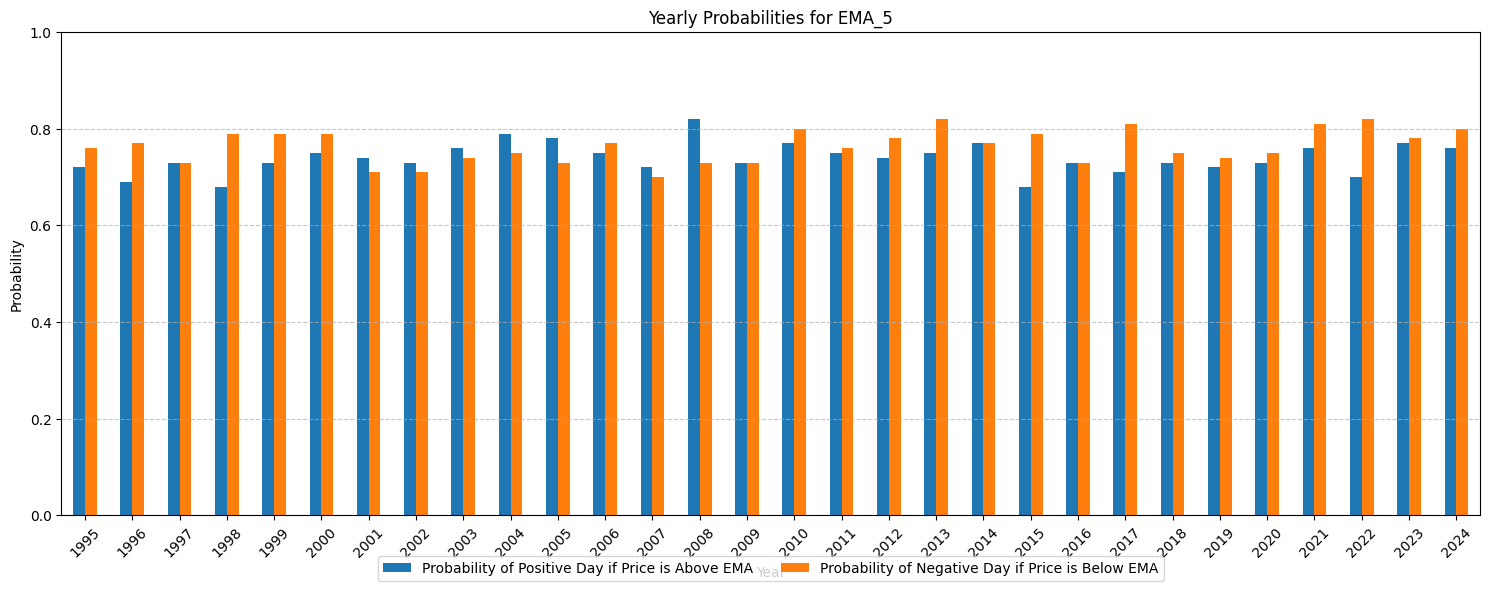

In [751]:
# Plot probabilities of positive and negative days for EMA_5
ax = ema_5_df.plot(
    kind='bar',
    figsize=(15, 6),  # Increase width and height
    title='Yearly Probabilities for EMA_5',
    ylabel='Probability',
    xlabel='Year',
    rot=45
)
ax.set_ylim(0, 1)

# Move the legend to the bottom of the chart
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Center legend at the bottom with 2 columns

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


### **Interpretation - 'Yearly Probabilities for EMA_5'**
- This bar-chart displays the Probability of a Positive day if price is above EMA and the Pobability of a Negative Day if price is Below. 
- The most important year that stands out as it is clearly different from all other years is 2008. There has not been a similar year since. 
- The results for 2008 are: {'Probability of Positive Day if Price is Above EMA': 0.82, 'Probability of Negative Day if Price Below EMA': 0.73}
- Perhaps this is a sign of the euphoria in the markets during that year. 

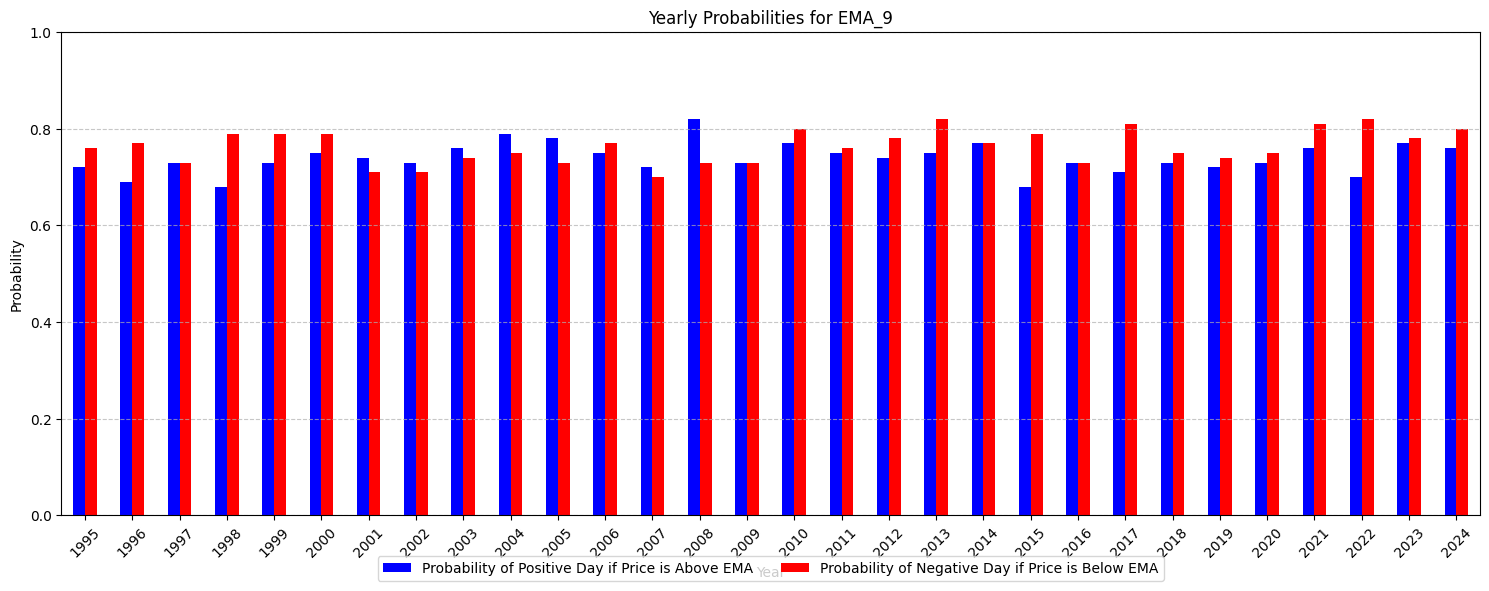

In [752]:
bar_colors = ['blue', 'red']  
# Plot probabilities of positive and negative days for EMA_9
ax = ema_9_df.plot(
    kind='bar',
    figsize=(15, 6),  # Increase width and height
    title='Yearly Probabilities for EMA_9',
    ylabel='Probability',
    xlabel='Year',
    rot=45,
    color=bar_colors  
)
ax.set_ylim(0, 1)

# Move the legend to the bottom of the chart
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Center legend at the bottom with 2 columns

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [753]:
# Reset the index to make "Year" a column
ema_5_df = ema_5_df.reset_index()
ema_5_df['Year'] = ema_5_df['Year'].astype(int)
ema_5_df = ema_5_df[['Year'] + [col for col in ema_5_df.columns if col != 'Year']]


In [754]:
# Step 1: Add the 'Difference' column
ema_5_df['Difference'] = (
    ema_5_df['Probability of Positive Day if Price is Above EMA'] -
    ema_5_df['Probability of Negative Day if Price is Below EMA']
)

In [755]:
# Merge yearly_summary, ema_5_df, and spy_basicdata on 'Year'
merged_df = pd.merge(yearly_summary, ema_5_df, on='Year', how='inner')
merged_df = pd.merge(merged_df, spy_basicdata[['Year', 'Close']], on='Year', how='inner')

In [756]:
merged_df.to_csv('merged_df.csv', index=False)

In [757]:
# Ensure the data types are correct
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df['Yearly Performance (%)'] = merged_df['Yearly Performance (%)'].astype(float)
merged_df['Difference'] = merged_df['Difference'].astype(float)

### **Interpretation of 'Difference' (Between Probability of Positive vs Negative Day) and 'Yearly Performance (%)'**
- The purpose of the barcharts below is to visually show the 'Difference' between Probability of Positive vs Negative Day and how 2008 was an outlier of a year. 
- It is interested that we are not see that type of behavior in the market at the current moment, although the narrative is that we are very overextended. 
- NOTE: These charts had to be created on Tableau, because I was not able to do it properly with Plotly or Matplotliib. 

Exporting Process for Future Use

In [758]:
# Ensure the index is in datetime format
spy_basicdata.index = pd.to_datetime(spy_basicdata.index)
spy_basicdata['Year'] = spy_basicdata.index.year

In [759]:
ema_periods = [5, 9, 18, 21, 40, 50, 100]
yearly_probabilities = {}

In [760]:
# Group by year and calculate probabilities for each year
for year, year_data in spy_basicdata.groupby('Year'):
    yearly_probabilities[year] = {}

    for period in ema_periods:
        ema_column = f'EMA_{period}'
        above_col = f'Above_{ema_column}'  # Helper column to indicate if the price is above/below the EMA

        # Ensure the EMA column exists before proceeding
        if ema_column not in year_data.columns:
            continue  # Skip to the next EMA period if column is missing

        # Determine if Adj Close is above or below EMA and store in a new column
        year_data[above_col] = year_data['Close'] > year_data[ema_column]

        # Calculate probabilities for each EMA period
        total_above = year_data[year_data[above_col]].shape[0]
        total_below = year_data[~year_data[above_col]].shape[0]

        # Avoid division by zero if there are no days above/below
        prob_positive_if_above = (
            year_data[year_data[above_col] & (year_data['Close'].diff() > 0)].shape[0] / total_above
            if total_above > 0 else 0
        )
        prob_negative_if_below = (
            year_data[~year_data[above_col] & (year_data['Close'].diff() < 0)].shape[0] / total_below
            if total_below > 0 else 0
        )

        # Store yearly probabilities
        yearly_probabilities[year][f'EMA_{period}'] = {
            'Probability of Positive Day if Above': round(prob_positive_if_above, 2),
            'Probability of Negative Day if Below': round(prob_negative_if_below, 2)
        }

In [761]:
export_data = []
for year, probs in yearly_probabilities.items():
    for ema, prob_data in probs.items():
        export_data.append({
            'Year': year,
            'EMA': ema,
            'Probability of Positive Day if Above': prob_data['Probability of Positive Day if Above'],
            'Probability of Negative Day if Below': prob_data['Probability of Negative Day if Below']
        })
yearly_probabilities_df = pd.DataFrame(export_data)
yearly_probabilities_df.to_csv('SPY_EMA_yearly_probabilities.csv', index=False)

In [762]:
yearly_probabilities_df['Year'] = pd.to_datetime(yearly_probabilities_df['Year'], format='%Y')
fig = px.line(
    yearly_probabilities_df,
    x='Year',
    y='Probability of Positive Day if Above',
    color='EMA',
    title="S&P500 - Probability of Positive Day if Price Above EMA over Time",
    labels={
        'Year': 'Year',
        'Probability of Positive Day if Price Above EMA': 'Probability of Positive Day if Price Above EMA',
        'EMA': 'EMA Period'
    }
)

# Define recession periods and convert to datetime
recession_periods = [
    {'start': pd.to_datetime('2001-03-01'), 'end': pd.to_datetime('2001-11-30')},
    {'start': pd.to_datetime('2007-12-01'), 'end': pd.to_datetime('2009-06-30')},
    {'start': pd.to_datetime('2020-02-01'), 'end': pd.to_datetime('2020-04-30')}
]

# Add vertical shaded regions for each recession
for recession in recession_periods:
    fig.add_vrect(
        x0=recession['start'], x1=recession['end'],
        fillcolor="grey", opacity=0.3, line_width=0,
        annotation_text="Recession", annotation_position="top left"
    )

fig.update_layout(
    xaxis=dict(title='Year', type='date'),
    yaxis=dict(title='Probability of Positive Day if Price Above EMA'),
    legend=dict(title="EMA Period")
)

fig.show()


### **Interpretation: Probability of Positive Day if Price Above EMA Over time**

### **Different EMA Lines:**

**The chart "S&P500 - Probability of Positive Day if Price Above EMA over Time", includes multiple EMA periods: EMA_5, EMA_9, EMA_18, EMA_21, EMA_40, EMA_50, and EMA_100.** Shorter EMAs (e.g., EMA_5, EMA_9) are more responsive to recent price changes, while longer EMAs (e.g., EMA_50, EMA_100) smooth out price trends over longer durations.

### **Higher Probabilities for Shorter EMAs:**

The probabilities for shorter EMAs like EMA_5 and EMA_9 tend to be consistently higher, often between 0.7 and 0.8. This suggests that when the price is above shorter EMAs, the likelihood of a positive day increases significantly. Short-term EMAs (e.g., EMA_5, EMA_9) provide a higher probability of a positive day when prices are above them. This makes shorter EMAs potentially useful for traders focused on short-term signals.

### **Lower Probabilities for Longer EMAs:**

Longer EMAs like EMA_50 and EMA_100 show lower probabilities, usually between 0.55 and 0.6. This indicates that price movements relative to longer EMAs have less immediate influence on the probability of a positive day. Long-term EMAs (e.g., EMA_50, EMA_100) offer a lower but more stable probability of positive days, indicating a longer-term price strength signal.

### **Recession Periods & Post-Recession Recovery:**

The grey-shaded recession periods (e.g., around 2001, 2008, and 2020) coincide with significant drops in probabilities across all EMAs.
During recessions, the probability of a positive day decreases across all EMA periods. This highlights greater uncertainty and volatility during economic downturns. After recession periods, probabilities tend to recover, particularly for shorter EMAs. For example, after the 2008 financial crisis, EMA_5 and EMA_9 probabilities sharply increase and stabilize.

### **Practical Applications:** 

I personally do not consider this information to be signals to jump in and take any particular actions. In fact, no technical indicator should be considered green light to reduce risk and dive in to any particular direction. However, these high probability results are useful information that should be considered when taking action. 

--------------------------------------------------------------------------------------------------------------------------------------------------